<a href="https://colab.research.google.com/github/aditya26091999/music-genre-classification/blob/main/music-genre-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Collab is meant to house the code for DMW-Mini-Project. The project deals with classifying the songs into respective genres.The datasets that can be used include Spotify, Gaana, Wynk, Shazam, Saavn, etc.Yet another audio dataset that can be used is GTZAN dataset.

The dataset will be trained on some of the state-of-the-art classification algorithms like, SVM, Logistic Regression, CNN, Decision tree etc.

The best algorithm choice will be made, after proper examination of results, accuracy and other deciding factors

# Setting the Prerequisites

In [117]:
print('Welcome to the MUSIC-GENRE-CLASSIFICATION Project!')

Welcome to the MUSIC-GENRE-CLASSIFICATION Project!


In [118]:
#Downloading some Google-Collab exclusive dependencies
!pip install flask-ngrok

# Importing the necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
import plotly as p
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify,request
from IPython.display import display

# Dataset Insights

Dataset retrieval from Github

In [184]:
#loading the dataset from Github folder
datasetUrl = 'https://raw.githubusercontent.com/aditya26091999/music-genre-classification/main/Probable%20Datasets/26-Genres.csv'
dataset = pd.read_csv(datasetUrl)

Inspecting the original dataset structure and properties

In [120]:
#checking the dataset loaded from Github
display(dataset.head())


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Cleaning the dataset

In [185]:
#cleaning the dataset for unwanted genre classes and their associated rows
display(dataset.columns)
display(dataset.genre.unique())

columns_to_drop = ['artist_name', 'track_name', 'track_id', 'duration_ms','popularity', 'mode','time_signature']

rows_to_drop = ['Movie', 'R&B', 'A Capella', 'Alternative', 'Anime','Blues', 'Opera',"Children's Music", 'Children’s Music', 'Indie', 'Reggae', 'Reggaeton', 'Ska', 'Comedy', 'Soul','Soundtrack', 'World']

# Dropping the unwanted features(columns)
dataset.drop(columns_to_drop,axis=1,inplace=True)

# Dropping the unwanted classes(rows)
for x in rows_to_drop:
  dataset.drop(dataset.loc[dataset['genre'] == x].index,inplace=True)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

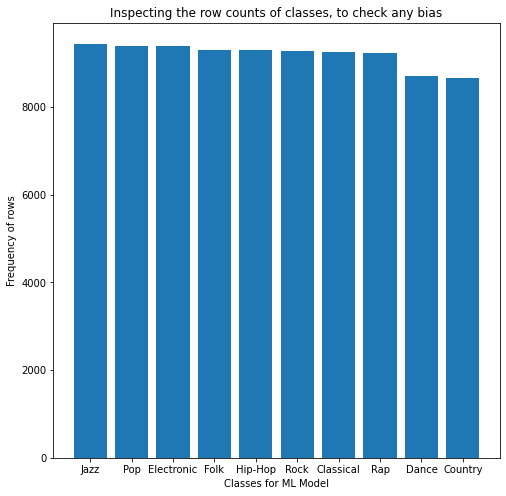

In [186]:
a = dataset.value_counts('genre')
x = a.index
y = a.values
fig,axs = plt.subplots(figsize=(8,8))
axs.bar(x,y)
axs.set_xlabel("Classes for ML Model")
axs.set_ylabel("Frequency of rows")
axs.set_title("Inspecting the row counts of classes, to check any bias")
plt.show()

In [237]:
#Checking for null values in the dataset
dataset.isna().sum()

#resetting the index, to ease cleaning of excess rows
dataset.sort_values(by=['genre'],inplace=True)
dataset.reset_index(drop=True,inplace=True)


#creating an empty dataset with same structure as that of original dataset-frame
final_dataset = dataset[0:0]

#making a list of output classes/genres
c = dataset.genre.unique()

#populating the final_dataset with equal rows from each genre
for x in c:
  b = dataset.loc[dataset['genre'].isin([x])]
  final_dataset = final_dataset.append(b.iloc[0:8664],ignore_index=True)

#resetting the index of final_dataset
final_dataset.reset_index(drop=True,inplace=True)

**Final Cleaned Dataset**

---



In [238]:
#Final cleaned dataset
display(final_dataset)

display(final_dataset.genre.value_counts())

,genre,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,Classical,0.76600,0.0942,0.0206,0.838000,C#,0.0851,-30.400,0.0413,83.671,0.0380
1,Classical,0.98600,0.3940,0.0336,0.919000,E,0.0723,-23.732,0.0415,66.636,0.0398
2,Classical,0.97900,0.4030,0.1470,0.647000,D,0.0564,-20.519,0.0406,128.729,0.4460
3,Classical,0.97300,0.4030,0.0920,0.595000,G,0.1940,-24.312,0.0382,130.786,0.3960
4,Classical,0.97400,0.3030,0.0504,0.922000,A#,0.0840,-33.142,0.0322,171.809,0.6460
...,...,...,...,...,...,...,...,...,...,...,...
86635,Rock,0.12100,0.3130,0.8940,0.000000,C#,0.0925,-3.579,0.0294,149.043,0.3620
86636,Rock,0.00455,0.3430,0.9770,0.019700,D,0.0948,-4.993,0.0579,166.664,0.7270
86637,Rock,0.33300,0.7030,0.4900,0.828000,C,0.4240,-7.430,0.0304,100.028,0.7080
86638,Rock,0.00109,0.5370,0.9700,0.000055,F#,0.0928,-2.391,0.0918,86.044,0.5810


Jazz          8664
Dance         8664
Country       8664
Hip-Hop       8664
Pop           8664
Electronic    8664
Rock          8664
Rap           8664
Classical     8664
Folk          8664
Name: genre, dtype: int64

In [239]:
display(final_dataset.describe())
print()
display(final_dataset.info())
print()
display(final_dataset.shape)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,86640.000000,86640.000000,86640.000000,86640.000000,86640.000000,86640.000000,86640.000000,86640.000000,86640.000000
mean,0.314205,0.584795,0.583039,0.152921,0.185881,-9.051282,0.095736,119.084392,0.453107
std,0.335610,0.175074,0.251371,0.304042,0.152505,5.952823,0.103179,29.547961,0.244234
min,0.000001,0.058200,0.000020,0.000000,0.012000,-47.599000,0.022200,34.208000,0.000000
25%,0.030700,0.477000,0.430000,0.000000,0.096200,-10.610250,0.035800,95.026000,0.257000
50%,0.164000,0.600000,0.623000,0.000037,0.123000,-7.240000,0.048600,119.015500,0.440000
75%,0.556000,0.711000,0.781000,0.050500,0.225000,-5.301000,0.104000,139.941000,0.641000
max,0.996000,0.987000,0.999000,0.994000,1.000000,1.585000,0.945000,236.799000,0.992000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86640 entries, 0 to 86639
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             86640 non-null  object 
 1   acousticness      86640 non-null  float64
 2   danceability      86640 non-null  float64
 3   energy            86640 non-null  float64
 4   instrumentalness  86640 non-null  float64
 5   key               86640 non-null  object 
 6   liveness          86640 non-null  float64
 7   loudness          86640 non-null  float64
 8   speechiness       86640 non-null  float64
 9   tempo             86640 non-null  float64
 10  valence           86640 non-null  float64
dtypes: float64(9), object(2)
memory usage: 7.3+ MB


None

(86640, 11)